📘 Notebook 01 : Predicting 30-Day Hospital Readmission Risk Using Machine Learning

Problem Framing & Data Understanding



**1. Introduction**

Hospital readmissions within 30 days of discharge are widely recognised as a key indicator of healthcare quality, continuity of care, and system efficiency. Unplanned readmissions are associated with increased healthcare costs, patient dissatisfaction, and avoidable clinical complications.

In the Philippine healthcare context, where tertiary hospitals often operate under constrained resources and fragmented post-discharge follow-up systems, early identification of patients at high risk of readmission can enable targeted interventions and more efficient allocation of limited clinical resources.

This notebook focuses on problem framing and data understanding, forming the foundation for subsequent data preprocessing, modelling, and evaluation steps.

**2. Business Problem**

Hospitals face challenges in identifying patients who are likely to be readmitted shortly after discharge. Without early risk stratification, post-discharge interventions are often applied uniformly or reactively, leading to inefficient use of clinical staff and avoidable readmissions.

**Business Objective:**

To identify patients at high risk of 30-day hospital readmission at the point of discharge.

Accurate identification of high-risk patients enables hospitals to prioritise post-discharge interventions such as follow-up calls, medication reconciliation, outpatient referrals, and care coordination, ultimately reducing readmission rates and associated costs.

**3. Data Science Problem**

From a data science perspective, this problem is formulated as a supervised binary classification task.

- Input: Patient demographics, admission details,
clinical history, and healthcare utilisation variables available at discharge.
- Output: Probability that a patient will be readmitted within 30 days.
- Prediction Timing: At or immediately after hospital discharge.

**Task Type**

- Supervised learning
- Binary classification

**4. Success Metrics**

**Technical Metrics**

- Primary metric: ROC-AUC, due to robustness to class imbalance.
- Secondary metrics: Recall, Precision, and F1-score.

**Business-Aligned Metric**

- Recall for high-risk patients, as false negatives represent missed opportunities for preventive intervention.

These metrics balance statistical performance with clinical and operational priorities.

**5. Dataset Description**

This project uses the Diabetes 130-US Hospitals for Years 1999–2008 dataset from the UCI Machine Learning Repository.

- Number of records: ~101,766 hospital encounters
- Number of features: 50
- Time period: 1999–2008
- Unit of analysis: Single hospital encounter
- Target variable: readmitted

Although the dataset originates from US hospitals, it is widely used in academic research and provides a robust proxy for demonstrating a transferable machine learning workflow that can later be adapted to Philippine hospital data with appropriate governance and validation.

**6. Ethical and Contextual Considerations**

- The dataset is fully de-identified and publicly released for research purposes.
- No personally identifiable information (PII) is present.
- Model outputs are intended to support, not replace, clinical decision-making.

Because the dataset originates from US hospitals, demographic composition and healthcare access patterns may differ from those in the Philippines. As such, bias assessment and local validation are necessary before real-world deployment.

In [51]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
from pathlib import Path

PROJECT_FOLDER = "JohnRaffyRaymundo_AIMCapstone2025"
PROJECT_ROOT = Path("/content/drive/MyDrive") / PROJECT_FOLDER

DATA_DIR = PROJECT_ROOT / "data"
DOCS_DIR = PROJECT_ROOT / "docs"

DATA_DIR.mkdir(parents=True, exist_ok=True)
DOCS_DIR.mkdir(parents=True, exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data directory:", DATA_DIR)



Project root: /content/drive/MyDrive/JohnRaffyRaymundo_AIMCapstone2025
Data directory: /content/drive/MyDrive/JohnRaffyRaymundo_AIMCapstone2025/data


In [53]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 80)

In [54]:
data_file = DATA_DIR / "diabetic_data.csv"

if not data_file.exists():
    raise FileNotFoundError(
        "diabetic_data.csv not found in data/ directory. "
        "Please download the dataset from UCI and upload it to Google Drive."
    )

print("Dataset found:", data_file)

Dataset found: /content/drive/MyDrive/JohnRaffyRaymundo_AIMCapstone2025/data/diabetic_data.csv


In [55]:
df = pd.read_csv(data_file)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


**7. Initial Data Structure**

This section examines the basic structure of the dataset, including data types and completeness, without performing any preprocessing or transformation.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [57]:
df.describe(include="all").transpose().head(20)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


**8. Missing Values**

The dataset uses the "?" character to represent missing values in several categorical fields. Identifying these patterns early is essential for informed preprocessing decisions in later stages.

In [58]:
missing_q = (df == "?").sum().sort_values(ascending=False)
missing_q[missing_q > 0].head(20)

,0
weight,98569
medical_specialty,49949
payer_code,40256
race,2273
diag_3,1423
diag_2,358
diag_1,21


**9. Numeric Feature Distributions & Outlier Screening**

Before any cleaning or transformation, a light exploratory screening is performed to
understand the distribution and potential outliers in key numeric variables.  
No values are removed or altered at this stage; decisions are deferred to Notebook 02.

This step supports early data quality assessment and informs downstream preprocessing.

In [65]:
numeric_cols = [
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_inpatient",
    "number_emergency",
    "number_outpatient",
    "number_diagnoses"
]

# Descriptive statistics
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


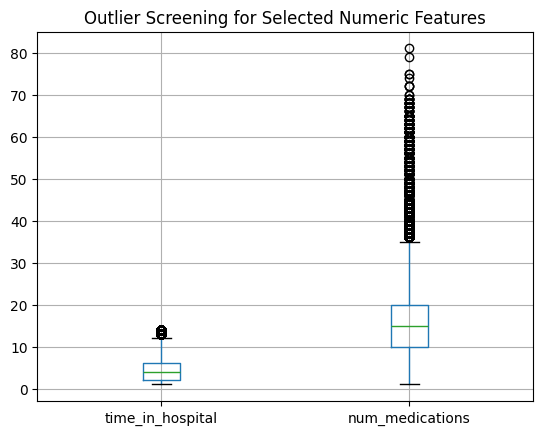

In [66]:
import matplotlib.pyplot as plt

df.boxplot(column=["time_in_hospital", "num_medications"])
plt.title("Outlier Screening for Selected Numeric Features")
plt.show()

**9. Duplicate Records**

Duplicate hospital encounters may bias model training if not identified and addressed.

In [59]:
df.duplicated().sum()

np.int64(0)

**10. Target Variable: Readmission**

The target variable readmitted captures whether a patient was readmitted within a specific time window following discharge.

In [60]:
df["readmitted"].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


In [61]:
(df["readmitted"].value_counts(normalize=True) * 100).round(2)


,proportion
readmitted,
NO,53.91
>30,34.93
<30,11.16


**11. Feature Types**

Understanding the balance between numeric and categorical features informs downstream preprocessing and modelling decisions.

In [62]:
num_features = df.select_dtypes(include=[np.number]).columns
cat_features = [c for c in df.columns if c not in num_features]

len(num_features), len(cat_features)

(13, 37)

**12. Data Dictionary**

To improve reproducibility and documentation quality, a data dictionary is automatically generated and saved to the docs/ directory.

In [63]:
def sample_value(series):
    s = series[(series.notna()) & (series != "?")]
    return s.iloc[0] if len(s) > 0 else None

data_dictionary = pd.DataFrame({
    "feature": df.columns,
    "dtype": df.dtypes.astype(str),
    "unique_values": [df[c].nunique() for c in df.columns],
    "sample_value": [sample_value(df[c]) for c in df.columns]
})

data_dictionary.head()

,feature,dtype,unique_values,sample_value
encounter_id,encounter_id,int64,101766,2278392
patient_nbr,patient_nbr,int64,71518,8222157
race,race,object,6,Caucasian
gender,gender,object,3,Female
age,age,object,10,[0-10)


In [64]:
def sample_value(series):
    s = series[(series.notna()) & (series != "?")]
    return s.iloc[0] if len(s) > 0 else None

data_dictionary = pd.DataFrame({
    "feature": df.columns,
    "dtype": df.dtypes.astype(str),
    "unique_values": [df[c].nunique() for c in df.columns],
    "sample_value": [sample_value(df[c]) for c in df.columns]
})

data_dictionary.head()


,feature,dtype,unique_values,sample_value
encounter_id,encounter_id,int64,101766,2278392
patient_nbr,patient_nbr,int64,71518,8222157
race,race,object,6,Caucasian
gender,gender,object,3,Female
age,age,object,10,[0-10)


**Data Dictionary Notes**

The table below summarizes feature names, inferred data types, and example values.
Where official units or medical thresholds are not provided in the source dataset,
numeric variables represent counts or coded quantities as defined by the UCI repository.

Categorical variables reflect encoded hospital system categories and are treated as
nominal features during preprocessing.

1**3. Summary and Transition to Data Preprocessing**

This notebook established a clear business and data science framing for predicting 30-day hospital readmissions and provided a structured understanding of the dataset.

Key observations include:

- The presence of missing values encoded as "?"
- A moderately imbalanced target variable
- A mix of categorical and numeric features
- No duplicate records detected

The next notebook focuses on data cleaning, target engineering, and leakage-safe preprocessing, forming the basis for robust modelling.

## Notebook Scope Within Capstone Workflow

This notebook addresses the following capstone stages:

- **Step 1 – Problem Framing:** Clinical motivation, prediction objective, and impact
- **Step 2 – Data Understanding:** Dataset structure, feature overview, missing values,
  distributions, outlier screening, and data dictionary creation

Subsequent notebooks will cover:
- **Notebook 02:** Data cleaning, target engineering, and preprocessing pipelines
- **Notebook 03:** Exploratory analysis, feature selection, and dimensionality reduction
- **Notebook 04+:** Modeling, evaluation, and interpretation
